<div align="center">

  # <span style="color:black;">**PERANCANGAN APLIKASI SAINS DATA**</span>
  #### <span style="color:black;">BELUM KEPIKIRAN JUDUL</span>

---

</div>

**Catatan analisis yang dibuat oleh:**

1. Himam Bashiran (NIM: 2311110055)
2. Leonardus Ananto Widodo (NIM: 2311110058)
3. Shafa Syahida (NIM: 2311110050)
4. Donna Nur Tamara (NIM: 2311110014)
5. Brian Nugraha Wiyono (NIM: 2311110052)

  # <b><font color='black'>Palmer Penguin Analysis</font></b>
---

- Task : Classification
- Objective : Prediksi Klasifikasi Spesies Penguin

   # <b><font color='black'>Importing All Necessary Libraries</font></b>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

   # <b><font color='black'>Data Collection</font></b>
---
Dataset Palmer Penguin dapat diakses dari website kaggle [Palmer Penguins Dataset](https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset/data)

In [2]:
# Load Data
df = pd.read_csv('/content/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


   # <b><font color='black'>Exploratory Data Analysis (EDA)</font></b>
---
Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami karakteristik dataset sebelum melakukan pemodelan atau pengambilan keputusan.

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [8]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


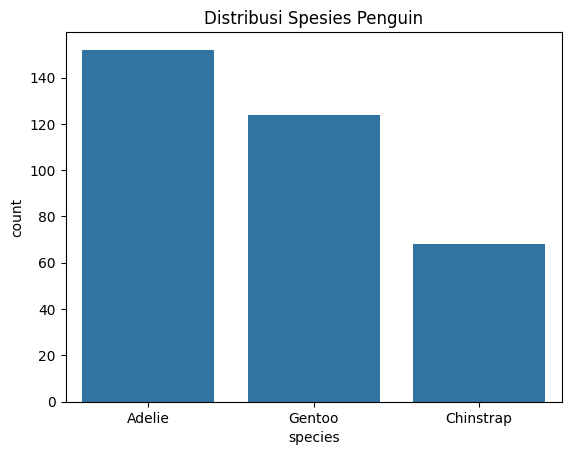

In [10]:
# Visualisasi distribusi species
sns.countplot(x='species', data=df)
plt.title('Distribusi Spesies Penguin')
plt.show()

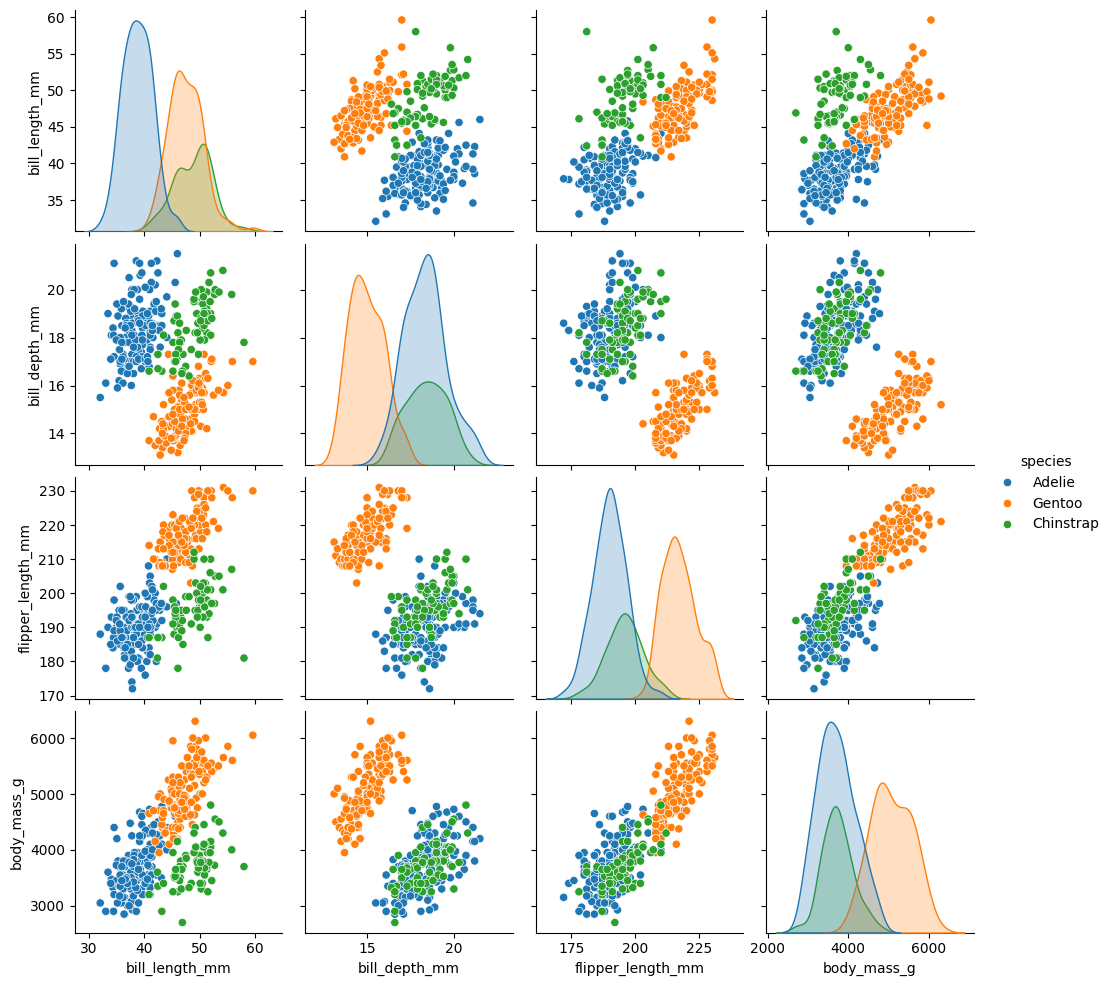

In [12]:
# Pairplot antar fitur
sns.pairplot(df, hue='species')
plt.show()

   # <b><font color='black'>Data pre-processing</font></b>
---
Serangkaian langkah atau teknik yang dilakukan untuk mempersiapkan data mentah menjadi data yang siap digunakan dalam analisis data dan pemodelan.

In [16]:
# Menghapus kolom yang kurang relevan
df.drop(['island', 'sex'], axis=1, inplace=True)

In [18]:
# Menghapus missing values
df.dropna(inplace=True)

In [19]:
# Encode label target
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [21]:
# Memisahkan fitur dan target
X = df.drop('species', axis=1)
y = df['species']

In [22]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

  # <b><font color='black'>Training Machine Learning</font></b>
---
* Choose Best Score Model
* Kita harus mengalahkan benchmark/baseline

  # <b><font color='black'>Machine Learning Klasik</font></b>
---
Beberapa model yang kami gunakan yaitu Logistic Regression, Random Forest, Decision Tree, KNN, Dan SVC

In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()
}

  # <b><font color='black'>Benchmark / Baseline</font></b>
---
- Baseline untuk evaluasi nanti
- Karena ini adalah kasus klasifikasi, baseline bisa diambil dari proporsi kelas target (spesies penguin) yang paling dominan.
- Dengan kata lain, kita bisa membuat tebakan sederhana bahwa semua penguin termasuk dalam spesies yang paling banyak muncul (misalnya, Adelie) tanpa menggunakan pemodelan apa pun.

In [25]:
# Cari species yang paling banyak
baseline_accuracy = y_train.value_counts().max() / len(y_train)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.4249


In [28]:
# Training dan Cross-validation
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_scores[name] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f}")

Logistic Regression Accuracy: 0.9927
Random Forest Accuracy: 0.9743
Decision Tree Accuracy: 0.9559
K-Nearest Neighbors Accuracy: 0.9889
Support Vector Classifier Accuracy: 0.9816


In [29]:
# Pilih model terbaik
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Logistic Regression


In [31]:
# Fit model terbaik
best_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

  # <b><font color='black'>Evaluation</font></b>
---
Evaluation digunakan untuk mengukur kinerja model pada dataset uji (test set).


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        23

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Confusion Matrix:


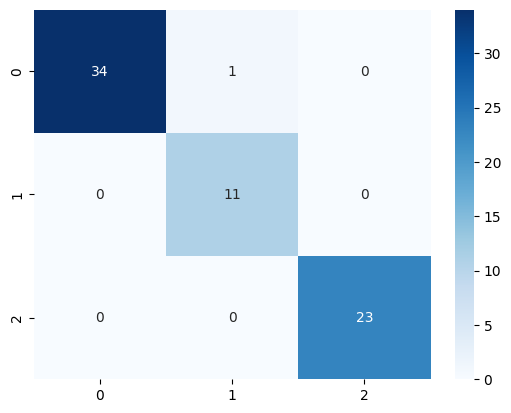

Test Accuracy: 0.9855


In [32]:
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

  # <b><font color='black'>Simpan Model</font></b>
---
Untuk memastikan reproduktifitas, kami menyimpan model ke dalam file .pkl dengan menggunakan library pickle dari Python.

In [33]:
with open('best_penguin_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_penguin_model.pkl'")

Model saved as 'best_penguin_model.pkl'
